In [1]:
import nltk
import random

In [2]:
from nltk.corpus import names

In [3]:
names.fileids()

['female.txt', 'male.txt']

In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
%matplotlib inline

In [5]:
cfd = nltk.ConditionalFreqDist((fileid,name[-2:]) for fileid in names.fileids() for name in names.words(fileid))

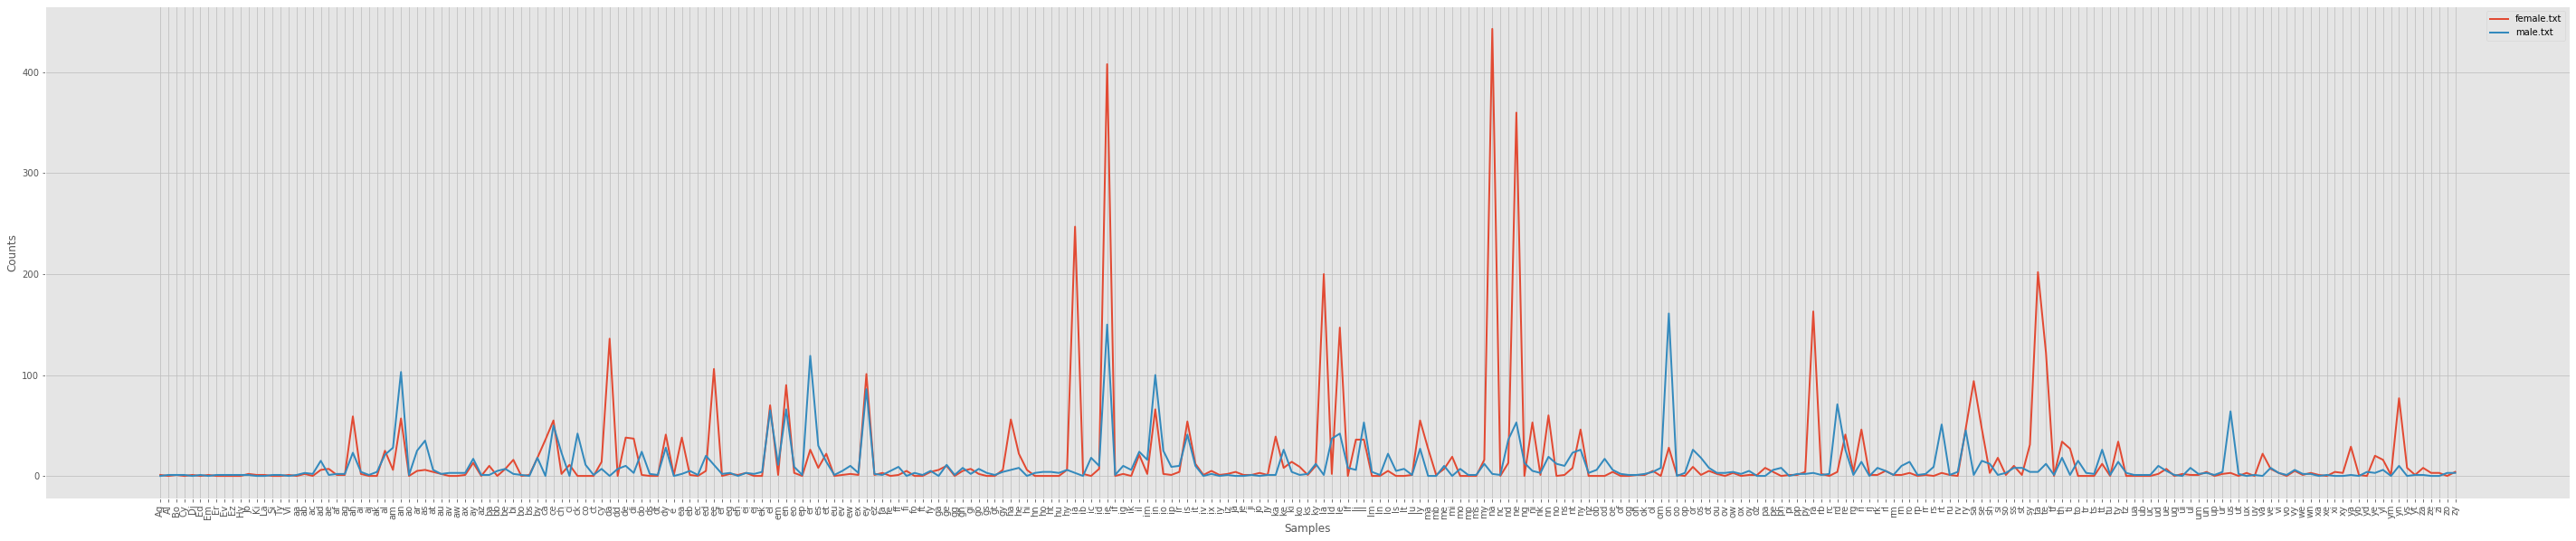

In [6]:
plt.figure(figsize=(50,10))
cfd.plot()

In [9]:
ns = [(fileid,name[-2:], name)for fileid in names.fileids() for name in names.words(fileid)]

In [10]:
ns[:10]

[('female.txt', 'el', 'Abagael'),
 ('female.txt', 'il', 'Abagail'),
 ('female.txt', 'be', 'Abbe'),
 ('female.txt', 'ey', 'Abbey'),
 ('female.txt', 'bi', 'Abbi'),
 ('female.txt', 'ie', 'Abbie'),
 ('female.txt', 'by', 'Abby'),
 ('female.txt', 'el', 'Abigael'),
 ('female.txt', 'il', 'Abigail'),
 ('female.txt', 'le', 'Abigale')]

In [15]:
def name_features(name):
    return {"pair" : name[-2:]}

In [16]:
name_features("Katy")

{'pair': 'ty'}

In [18]:
name_list = [(name, "male") for name in names.words("male.txt")] + [(name, "female") for name in names.words("female.txt")]

In [19]:
name_list[:10]

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male')]

In [21]:
name_list[-10:]

[('Zonnya', 'female'),
 ('Zora', 'female'),
 ('Zorah', 'female'),
 ('Zorana', 'female'),
 ('Zorina', 'female'),
 ('Zorine', 'female'),
 ('Zsa Zsa', 'female'),
 ('Zsazsa', 'female'),
 ('Zulema', 'female'),
 ('Zuzana', 'female')]

In [22]:
random.shuffle(name_list)

In [23]:
name_list[:10]

[('Elyn', 'female'),
 ('Dinah', 'female'),
 ('Charity', 'female'),
 ('Darryl', 'male'),
 ('Natale', 'male'),
 ('Isador', 'female'),
 ('Terry', 'female'),
 ('Zach', 'male'),
 ('Jeremiah', 'male'),
 ('Windham', 'male')]

In [24]:
features = [(name_features(name), gender) for (name, gender) in name_list]

In [25]:
features[:10]

[({'pair': 'yn'}, 'female'),
 ({'pair': 'ah'}, 'female'),
 ({'pair': 'ty'}, 'female'),
 ({'pair': 'yl'}, 'male'),
 ({'pair': 'le'}, 'male'),
 ({'pair': 'or'}, 'female'),
 ({'pair': 'ry'}, 'female'),
 ({'pair': 'ch'}, 'male'),
 ({'pair': 'ah'}, 'male'),
 ({'pair': 'am'}, 'male')]

In [26]:
len(features)/2

3972.0

In [27]:
training_set = features[:3972]
testing_set = features[3972:]

We can use the Naive Bayes Classifier to train our model. https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [28]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [29]:
male_names = names.words('male.txt')
"Carmello" in male_names

False

In [31]:
classifier.classify(name_features("Carmello"))

'male'

In [32]:
nltk.classify.accuracy(classifier, testing_set)

0.777693856998993

https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego